we import the necessary libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np

Give the constant for calculation

In [3]:
h = 6.62607015e-34
c = 3e+8
kB = 1.380649e-23

Input a two level system: g-multiplisity, E-energy level, A-spontanous emission transition probability;1eV=1.60218e-19J

In [4]:
g1 = 1
g2 = 3
E1 = 0
E2 = 6700*1.60218e-19
A21 = 4.57e+14

Input the temperature of the system

In [5]:
T = 1e8

Calculate the frequency of photon which could make this transition

In [6]:
nu = ( E2 - E1 )/h

Calculate the mean intensity

In [7]:
u = ( ( 2*h*(nu**3)) / (c**2) )/(np.exp( (h*nu) / (kB*T) )-1)

Calculate B-coefficients

In [8]:
B21 = ((c**2) / (2*h*(nu**3))) * A21
B12 = B21 * ( g2 / g1 )

Calculate emission rate and absorbtion rate

In [9]:
lamda12 = B12 * u
lamda21 = A21 + B21 * u

Input initial condition (number density n) of two states

In [10]:
x10 = 0
x20 = 1

Input time duration for the evolution of population in two states

In [11]:
t = np.linspace(0,2.8e-14)

Calculate the evolution of population 

In [12]:
f = (lamda12 + lamda21)*t
expf =  np.expm1(-f)+1
x1 = x10 * expf + (lamda21/(lamda12+lamda21))*(1-expf)
x2 = x20 * expf + (lamda12/(lamda12+lamda21))*(1-expf)

Make a plot to show the evolution

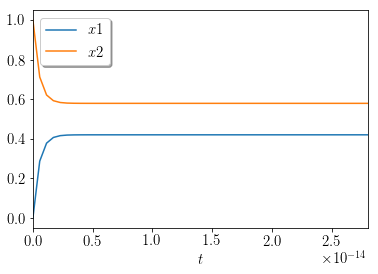

In [13]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['font.size'] = 15

plt.plot(t, x1, label=r"$x1$" )
plt.plot(t, x2, label=r"$x2$" )

plt.legend(loc='upper left', shadow=True)

plt.xlabel( '$t$' )

plt.xlim( 0, 2.8e-14 )

plt.show()

Print out Einestein B-coefficient : B12*Mean Intensiy--Spontaneous Absorption ; B21*Mean Intensity--Stimulated Emission

In [21]:
print ("B12 =", B12)
print ("B21 =", B21)

B12 = 21897962157.08411
B21 = 7299320719.028037


Print out absorption rate lamda12 and emission rate lamda21

In [22]:
print ("absorption rate lamda12 =",lamda12)
print ("emission rate lamda21 =",lamda21)

absorption rate lamda12 = 1165781772648462.5
emission rate lamda21 = 845593924216154.1
